## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [9]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [11]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10,activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    return model
model = build_mlp()

In [13]:
# Compile 模型
model.summary()
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = optimizer)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 1s 29us/step - loss: 2.0691 - accuracy: 0.2574 - val_loss: 1.9435 - val_accuracy: 0.3009
Epoch 2/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.8822 - accuracy: 0.3356 - val_loss: 1.8498 - val_accuracy: 0.3364
Epoch 3/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.8181 - accuracy: 0.3593 - val_loss: 1.8243 - val_accuracy: 0.3619
Epoch 4/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.7698 - accuracy: 0.3799 - val_loss: 1.8140 - val_accuracy: 0.3620
Epoch 5/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.7342 - accuracy: 0.3900 - val_loss: 1.7601 - val_accuracy: 0.3793
Epoch 6/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.7014 - accuracy: 0.4025 - val_loss: 1.7407 - val_accuracy: 0.3913
Epoch 7/500
50000/50000 [==============================] - 1s 

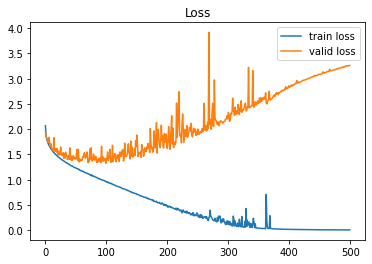

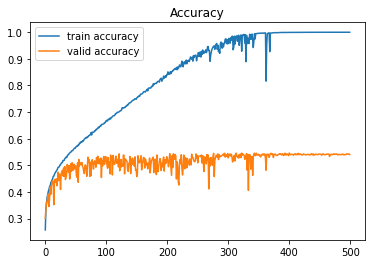

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()